# Real-ESRGAN Inference Demo

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2107.10833)
[![GitHub Stars](https://img.shields.io/github/stars/xinntao/Real-ESRGAN?style=social)](https://github.com/xinntao/Real-ESRGAN)
[![download](https://img.shields.io/github/downloads/xinntao/Real-ESRGAN/total.svg)](https://github.com/xinntao/Real-ESRGAN/releases)

This is a **Practical Image Restoration Demo** of our paper [''Real-ESRGAN: Training Real-World Blind Super-Resolution with Pure Synthetic Data''](https://arxiv.org/abs/2107.10833).
We extend the powerful ESRGAN to a practical restoration application (namely, Real-ESRGAN), which is trained with pure synthetic data. <br>
The following figure shows some real-life examples.

<img src="https://raw.githubusercontent.com/xinntao/Real-ESRGAN/master/assets/teaser.jpg" width="100%">

We provide a pretrained model (*RealESRGAN_x4plus.pth*) with upsampling X4.<br>
**Note that RealESRGAN may still fail in some cases as the real-world degradations are really too complex.**<br>
Moreover, it **may not** perform well on **human faces, text**, *etc*, which will be optimized later.
<br>

You can also find a **Portable Windows/Linux/MacOS executable files for Intel/AMD/Nvidia GPU.** in our [GitHub repo](https://github.com/xinntao/Real-ESRGAN). <br>
This executable file is **portable** and includes all the binaries and models required. No CUDA or PyTorch environment is needed.<br>
This executable file is based on the wonderful [Tencent/ncnn](https://github.com/Tencent/ncnn) and [realsr-ncnn-vulkan](https://github.com/nihui/realsr-ncnn-vulkan) by [nihui](https://github.com/nihui).

# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [ ]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 583, done.
remote: Total 583 (delta 0), reused 0 (delta 0), pack-reused 583
Receiving objects: 100% (583/583), 4.97 MiB | 18.44 MiB/s, done.
Resolving deltas: 100% (299/299), done.
/content/Real-ESRGAN
     |████████████████████████████████| 161 kB 5.3 MB/s 
     |████████████████████████████████| 5.8 MB 32.0 MB/s 
     |████████████████████████████████| 190 kB 16.7 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.5-py3-none-any.whl size=194482 sha256=d1c674c251a58fb95eb46fff2fd234ffd91b86999ec3ddb899f40bae206d3908
  Stored in directory: /root/.cache/pip/wheels/74/1b/d0/8659cf028233dd1e3bf282271009fbf037dfc4ab761f32a032
Successfully built basicsr
     |████████████████████████████████| 59 kB 3.0 MB/s 
     |████████████████████████████████| 177 kB 10.8 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=1b0cb7f6b59865bd71c553a2acb51c39ce99e63a5050c74bafc97e2b536be845
  Stored i

running develop
running egg_info
creating realesrgan.egg-info
writing realesrgan.egg-info/PKG-INFO
writing dependency_links to realesrgan.egg-info/dependency_links.txt
writing requirements to realesrgan.egg-info/requires.txt
writing top-level names to realesrgan.egg-info/top_level.txt
writing manifest file 'realesrgan.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'realesrgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/realesrgan.egg-link (link to .)
Adding realesrgan 0.2.4.0 to easy-install.pth file

Installed /content/Real-ESRGAN
Processing dependencies for realesrgan==0.2.4.0
Searching for tqdm==4.63.0
Best match: tqdm 4.63.0
Adding tqdm 4.63.0 to easy-install.pth file
Installing tqdm script to /usr/local/bin

Using /usr/local/lib/python3.7/dist-packages
Searching for torchvision==0.11.1+cu111
Best match: torchvision 0.11.1+cu111
Adding torchvision 0.11.1+cu111 to easy-inst

# 2. Upload Images

Upload the images to be processed by Real-ESRGAN

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving 1.jpg to 1.jpg
move 1.jpg to upload/1.jpg


# 3. Inference


In [ ]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 3.5 --half --face_enhance
# Arguments

# -n, --model_name: Model names
# -i, --input: input folder or image
# --outscale: Output scale, can be arbitrary scale factore. 

Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:00<00:00, 156MB/s] 
Downloading: "https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth" to /usr/local/lib/python3.7/dist-packages/gfpgan/weights/GFPGANv1.3.pth

100% 332M/332M [00:16<00:00, 20.8MB/s]
Testing 0 1


# 4. Visualization

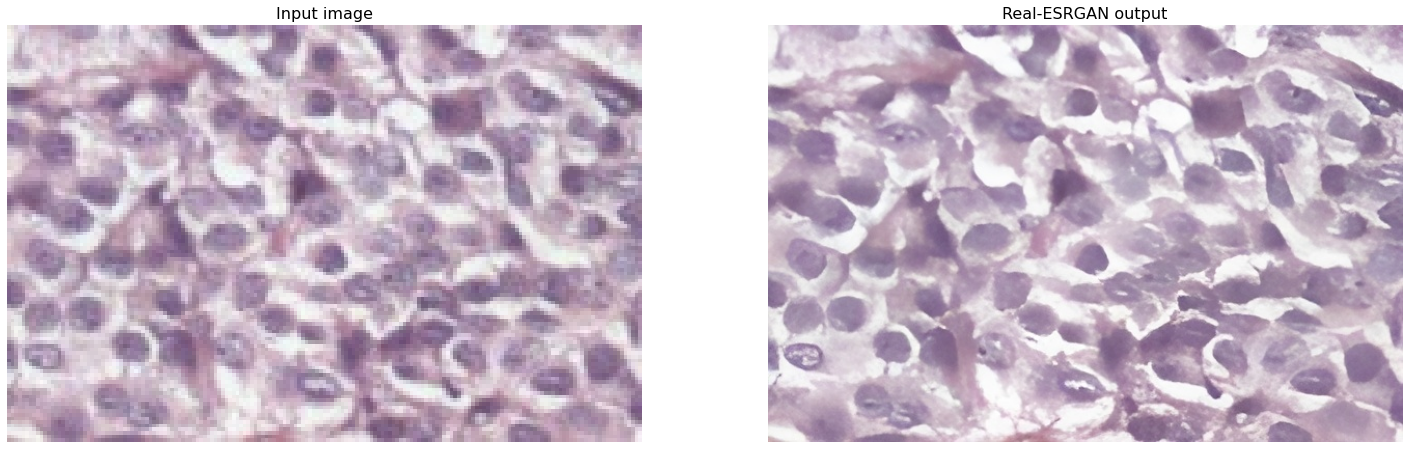

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)
  

In [ ]:
cv2.imwrite("img1.jpg", img_output)

True

# 5. Download Results


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
p1 = Image.open("/content/drive/MyDrive/project_images/project/Real-ergan-new/1_out.png")

import numpy as np
import cv2
from google.colab.patches import cv2_imshow
p1_o=cv2.imread("/content/drive/MyDrive/project_images/project/HR(Original)/13.png")
p1_s = cv2.imread("/content/drive/MyDrive/project_images/project/Real-ergan-new/13_out.png")


In [ ]:
def Mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA - imageB) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [ ]:
List_o = [None]*13
for i in range(0,13):
  path = "/content/drive/MyDrive/project_images/project/Real-ergan-new/"+str(i+1)+"_out.png"
  List_o[i] = cv2.imread(path)
List_s = [None]*13
for i in range(0,13):
  path = "/content/drive/MyDrive/project_images/project/Real-ergan-new/"+str(i+1)+"_out.png"
  List_s[i] = cv2.imread(path)
List_mse = [None]*13


In [ ]:
for x in range(0,13):
  r_s = np.empty((460,700),dtype = int)
  g_s = np.empty((460,700),dtype = int)
  b_s = np.empty((460,700),dtype = int)
  for i in range(0,460):
    for j in range(0,700):
      r_s[i][j] = (List_s[x])[i][j][0]
      g_s[i][j] = (List_s[x])[i][j][1]
      b_s[i][j] = (List_s[x])[i][j][2]

  r_o = np.empty((460,700),dtype = int)
  g_o = np.empty((460,700),dtype = int)
  b_o = np.empty((460,700),dtype = int)
  for i in range(0,460):
    for j in range(0,700):
      r_o[i][j] = (List_o[x])[i][j][0]
      g_o[i][j] = (List_o[x])[i][j][1]
      b_o[i][j] = (List_o[x])[i][j][2]
  mse_r = Mse(r_s,r_o)
  mse_g = Mse(g_s,g_o)
  mse_b = Mse(b_s,b_o)
  mse_total = (mse_r + mse_g + mse_b)/3
  List_mse[x] = mse_total


In [ ]:
mse_r = Mse(r_s,r_o)
mse_g = Mse(g_s,g_o)
mse_b = Mse(b_s,b_o)
mse_total = (mse_r + mse_g + mse_b)/3
mse_total

52.91770082815734

In [ ]:
for i in range(0,460):
  for j in range(0,700):
    r[i][j] = a[i][j][0]
    g[i][j] = a[i][j][1]
    b[i][j] = a[i][j][2]


In [ ]:
ao = np.array(i2)
r_o = np.empty((460,700),dtype = int)
g_o = np.empty((460,700),dtype = int)
b_o = np.empty((460,700),dtype = int)

In [ ]:
for i in range(0,460):
  for j in range(0,700):
    r_o[i][j] = ao[i][j][0]
    g_o[i][j] = ao[i][j][1]
    b_o[i][j] = ao[i][j][2]


In [ ]:
error = (mse(r,r_o)+mse(g,g_o)+mse(b,b_o))/3.0

In [ ]:
g


array([[236, 237, 236, ..., 127, 121, 111],
       [238, 240, 240, ..., 139, 125, 131],
       [241, 244, 241, ..., 154, 141, 138],
       ...,
       [160, 162, 163, ..., 253, 252, 251],
       [160, 160, 164, ..., 250, 248, 247],
       [157, 162, 161, ..., 240, 240, 241]])

In [ ]:
b

array([[240, 241, 240, ..., 165, 162, 150],
       [241, 241, 241, ..., 173, 161, 167],
       [242, 244, 243, ..., 185, 175, 173],
       ...,
       [177, 181, 182, ..., 251, 249, 248],
       [177, 177, 180, ..., 248, 246, 245],
       [173, 177, 176, ..., 237, 236, 237]])

In [ ]:

err1=mse(gray_image_1,im1)
err2=mse(gray_image_2,im2)
err3=mse(gray_image_3,im3)
err4=mse(gray_image_4,im4)
err5=mse(gray_image_5,im5)
err6=mse(gray_image_6,im6)
err7=mse(gray_image_7,im7)
err8=mse(gray_image_8,im8)
err9=mse(gray_image_9,im9)
err10=mse(gray_image_10,im10)
err11=mse(gray_image_11,im11)
err12=mse(gray_image_12,im12)
err13=mse(gray_image_13,im13)
print(err1)
print(err2)
print(err3)
print(err4)
print(err5)
print(err6)
print(err7)
print(err8)
print(err9)
print(err10)
print(err11)
print(err12)
print(err13)

26.05238198757764
16.451344720496895
14.105046583850932
28.43953105590062
10.559301242236025
16.02986645962733
10.8282950310559
20.829083850931678
45.56712111801242
20.700546583850933
21.53117701863354
51.561214285714286
29.03085403726708


In [ ]:
img_original[0][0]

array([231, 226, 225], dtype=uint8)

In [ ]:
import numpy as np
def mse(imageA, imageB):
	count = 0
	for i in range(460):
		for j in range(700):
			for k in range(3):
				count+=((np.array(imageA)[i][j][k]-np.array(imageB)[i][j][k])**2)
        #changed version
        np.array(imageA)[i][j][k]/=((np.array(imageA)[i][j][0]+np.array(imageA)[i][j][1]+np.array(imageA)[i][j][2]))
				np.array(imageB)[i][j][k] /= ( np.array(imageB)[i][j][0] + np.array(imageB)[i][j][1] + np.array(imageB)[i][j][2] )
        count+=((np.array(imageA)[i][j][k]-np.array(imageB)[i][j][k])**2)
        count/=(460*700*3)
	return count
	#print(count) 
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	##err = np.sum((imageA - imageB) ** 2)
	##err /= float(imageA.shape[0] * imageA.shape[1])
	# Changed version
	##err = np.sum((imageA - imageB) ** 2)
  ##err /= float(imageA.shape[0] * imageA.shape[1] * imageA.shape[2])
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	

TabError: ignored

In [ ]:
import numpy as np

In [ ]:
print(np.array(img_original)[0][0][0],np.array(img_original)[0][0][1],np.array(img_original)[0][0][2])

231 226 225


In [ ]:
count=0
for i in range(460):
  for j in range(700):
    if(np.array(img_original)[i][j][0]==0):
      if(np.array(img_original)[i][j][1]==0):
        if(np.array(img_original)[i][j][2]==0):
          count+=1
print(count)

0


In [ ]:
np.array(img_original)-np.array(im1)

array([[[245, 240, 239],
        [255, 249, 250],
        [  1, 249, 253],
        ...,
        [241, 237, 227],
        [241, 237, 227],
        [234, 230, 220]],

       [[251, 247, 246],
        [  0, 254, 254],
        [250, 247, 249],
        ...,
        [  1,   2, 248],
        [247, 249, 236],
        [241, 239, 229]],

       [[249, 243, 244],
        [250, 247, 249],
        [251, 249, 250],
        ...,
        [  4,  14, 253],
        [  0,   8, 247],
        [247, 253, 238]],

       ...,

       [[219, 232,  10],
        [230, 243,  19],
        [236, 250,  21],
        ...,
        [250,   4,   3],
        [248, 255, 255],
        [250, 255,   2]],

       [[225, 236,  17],
        [224, 235,  12],
        [228, 239,  13],
        ...,
        [255,   8,  10],
        [243, 251, 255],
        [240, 245, 252]],

       [[219, 230,  11],
        [226, 237,  14],
        [230, 241,  15],
        ...,
        [234, 242, 246],
        [236, 244, 248],
        [235, 239, 248]]

In [ ]:
x = int(np.array(img_original)[i][j][0]) + int(np.array(img_original)[i][j][1]) + int(np.array(img_original)[i][j][2])

In [ ]:
temp = np.array(img_original)[0][0][0]
print(temp)
x = (int(np.array(img_original)[0][0][0]) + int(np.array(img_original)[0][0][1]) + int(np.array(img_original)[0][0][2]))
temp /= x
print(temp)

231
0.3387096774193548


In [ ]:
count=0
for i in range(460):
  for j in range(700):
    for k in range(3):
      temp = np.array(img_original)[i][j][k]
      x = (int(np.array(img_original)[i][j][0]) + int(np.array(img_original)[i][j][1]) + int(np.array(img_original)[i][j][2]))
      temp /= x

In [ ]:
import numpy as np
count = 0
for i in range(460):
  for j in range(700):
    for k in range(3):
      #count+=((np.array(img_original)[i][j][k]-np.array(im1)[i][j][k])**2)
      #changed version
      temp1 = np.array(img_original)[i][j][k]
      x1 = ( int(np.array(img_original)[i][j][0]) + int(np.array(img_original)[i][j][1]) + int(np.array(img_original)[i][j][2]))
      temp1 /= x1
      temp2 = np.array(im1)[i][j][k]
      x2 = ( int(np.array(im1)[i][j][0]) + int(np.array(im1)[i][j][1]) + int(np.array(im1)[i][j][2]))
      temp2 /= x2
      count += temp1 - temp2
count/=(460*700*3)
print(count)       

3.465424404762943e-19


In [ ]:
import numpy as np
Y = np.square(np.subtract(img_original,im1)).mean()
print("MSE:", Y)

MSE: 60.4863933747412


In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA - imageB) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [ ]:
err=mse(img_original, im1)
print(err)

181.4591801242236


In [ ]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
PSNR(img_original, im1)

29.454941927309566

In [ ]:
# Download the results
zip_filename = 'Real-ESRGAN_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>